In [2]:
print("num gpu:", len(tf.config.experimental.list_physical_devices('GPU')))

num gpu: 0


In [3]:
tf.test.is_built_with_cuda()

False

In [4]:
import tensorflow as tf


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import EfficientNetB7

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [7]:
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

In [8]:
datagen = ImageDataGenerator(
        rotation_range=20, # randomly rotate images by 20 degrees
        width_shift_range=0.2, # randomly shift images horizontally by 20% of the width
        height_shift_range=0.2, # randomly shift images vertically by 20% of the height
        horizontal_flip=True, # randomly flip images horizontally
        zoom_range=0.2) # randomly zoom images by up to 20%

In [9]:
label_a = ['angry']
X_train_a = []
y_train_a = []
image_size = 150
for i in label_a:
    folderPath = "C:/Users/JMD/Desktop/python ting/abc/dds2/" + i
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train_a.append(img)
        y_train_a.append(i)     
X_train_a = np.array(X_train_a)
y_train_a = np.array(y_train_a)

# fit the generator to the training data
datagen.fit(X_train_a)

# generate more images using the fitted generator
augmented_images_a = []
augmented_labels_a = []
for x_batch, y_batch in datagen.flow(X_train_a, y_train_a, batch_size=len(X_train_a)):
    augmented_images_a.extend(x_batch)
    augmented_labels_a.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_a, y_train_a, batch_size=len(X_train_a)):
    augmented_images_a.extend(x_batch)
    augmented_labels_a.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_a, y_train_a, batch_size=len(X_train_a)):
    augmented_images_a.extend(x_batch)
    augmented_labels_a.extend(y_batch)
    break
# convert the lists to arrays
augmented_images_a = np.array(augmented_images_a)
augmented_labels_a = np.array(augmented_labels_a)

#concatenate og data with augmented
X_train_augmented_a = np.concatenate((X_train_a, augmented_images_a))
y_train_augmented_a = np.concatenate((y_train_a, augmented_labels_a))

100%|██████████| 959/959 [00:02<00:00, 327.23it/s]


In [10]:
label_s = ['sad']
X_train_s = []
y_train_s = []
image_size = 150
for i in label_s:
    folderPath = "C:/Users/JMD/Desktop/python ting/abc/dds2/" + i
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train_s.append(img)
        y_train_s.append(i)     
X_train_s = np.array(X_train_s)
y_train_s = np.array(y_train_s)

# fit the generator to the training data
datagen.fit(X_train_s)

# generate more images using the fitted generator
augmented_images_s = []
augmented_labels_s = []
for x_batch, y_batch in datagen.flow(X_train_s, y_train_s, batch_size=len(X_train_s)):
    augmented_images_s.extend(x_batch)
    augmented_labels_s.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_s, y_train_s, batch_size=len(X_train_s)):
    augmented_images_s.extend(x_batch)
    augmented_labels_s.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_s, y_train_s, batch_size=len(X_train_s)):
    augmented_images_s.extend(x_batch)
    augmented_labels_s.extend(y_batch)
    break
# convert the lists to arrays
augmented_images_s = np.array(augmented_images_s)
augmented_labels_s = np.array(augmented_labels_s)

#concatenate og data with augmented
X_train_augmented_s = np.concatenate((X_train_s, augmented_images_s))
y_train_augmented_s = np.concatenate((y_train_s, augmented_labels_s))

100%|██████████| 1500/1500 [00:04<00:00, 334.30it/s]


In [11]:
label_h = ['happy']
X_train_h = []
y_train_h = []
image_size = 150
for i in label_h:
    folderPath = "C:/Users/JMD/Desktop/python ting/abc/dds2/" + i
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train_h.append(img)
        y_train_h.append(i)     
X_train_h = np.array(X_train_h)
y_train_h = np.array(y_train_h)

# fit the generator to the training data
datagen.fit(X_train_h)

# generate more images using the fitted generator
augmented_images_h = []
augmented_labels_h = []
for x_batch, y_batch in datagen.flow(X_train_h, y_train_h, batch_size=len(X_train_h)):
    augmented_images_h.extend(x_batch)
    augmented_labels_h.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_h, y_train_h, batch_size=len(X_train_h)):
    augmented_images_h.extend(x_batch)
    augmented_labels_h.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_h, y_train_h, batch_size=len(X_train_h)):
    augmented_images_h.extend(x_batch)
    augmented_labels_h.extend(y_batch)
    break
# convert the lists to arrays
augmented_images_h = np.array(augmented_images_h)
augmented_labels_h = np.array(augmented_labels_h)

#concatenate og data with augmented
X_train_augmented_h = np.concatenate((X_train_h, augmented_images_h))
y_train_augmented_h = np.concatenate((y_train_h, augmented_labels_h))

100%|██████████| 1029/1029 [00:03<00:00, 323.04it/s]


In [8]:
label_r = ['relaxed']
X_train_r = []
y_train_r = []
image_size = 150
for i in label_r:
    folderPath = "C:/Users/JMD/Desktop/python ting/abc/dds2/" + i
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train_r.append(img)
        y_train_r.append(i)     
X_train_r = np.array(X_train_r)
y_train_r = np.array(y_train_r)

# fit the generator to the training data
datagen.fit(X_train_r)

# generate more images using the fitted generator
augmented_images_r = []
augmented_labels_r = []
for x_batch, y_batch in datagen.flow(X_train_r, y_train_r, batch_size=len(X_train_r)):
    augmented_images_r.extend(x_batch)
    augmented_labels_r.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_r, y_train_r, batch_size=len(X_train_r)):
    augmented_images_r.extend(x_batch)
    augmented_labels_r.extend(y_batch)
    break
for x_batch, y_batch in datagen.flow(X_train_r, y_train_r, batch_size=len(X_train_r)):
    augmented_images_r.extend(x_batch)
    augmented_labels_r.extend(y_batch)
    break
# convert the lists to arrays
augmented_images_r = np.array(augmented_images_r)
augmented_labels_r = np.array(augmented_labels_r)

#concatenate og data with augmented
X_train_augmented_r = np.concatenate((X_train_r, augmented_images_r))
y_train_augmented_r = np.concatenate((y_train_r, augmented_labels_r))

100%|██████████| 1000/1000 [00:03<00:00, 330.93it/s]


In [12]:
X_train_1 = np.concatenate((X_train_augmented_h, X_train_augmented_s))
y_train_1 = np.concatenate((y_train_augmented_h, y_train_augmented_s))

In [10]:
X_train_2 = np.concatenate((X_train_augmented_a, X_train_augmented_r))
y_train_2 = np.concatenate((y_train_augmented_a, y_train_augmented_r))

In [11]:
X_train = np.concatenate((X_train_2, X_train_1))
y_train = np.concatenate((y_train_2,y_train_1))

In [13]:
#for 3 classes
X_train = np.concatenate((X_train_augmented_a, X_train_1))
y_train = np.concatenate((y_train_augmented_a,y_train_1))

In [10]:
augmented_images.shape

NameError: name 'augmented_images' is not defined

In [11]:
X_train_augmented.shape

NameError: name 'X_train_augmented' is not defined

In [8]:
labels = ['happy','relaxed','sad']
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = 'C:/Users/JMD/Desktop/python ting/abc/DogDataset/'+i
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)        
X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 4432/4432 [00:12<00:00, 343.70it/s]


In [9]:
X_train = np.concatenate((X_train, X_train_augmented))
y_train = np.concatenate((y_train, y_train_augmented))

In [14]:
print(X_train.shape)
print(y_train.shape)

(13952, 150, 150, 3)
(13952,)


In [25]:
X,Y = shuffle(X,Y, random_state=101)

NameError: name 'X' is not defined

In [15]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)
X_train,X_test,y_train,y_test = train_test_split(X_train, y_train, test_size=0.3,random_state=101)

In [17]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [16]:
#label = ['happy','angry','relaxed','sad']
label = ['happy','angry','sad']

In [31]:
y_test


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [17]:
y_train_new = []
for i in y_train:
    y_train_new.append(label.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(label.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

132/132 [==============================] - 9s 69ms/step


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       277
           1       0.36      0.93      0.52      1313
           2       0.53      0.19      0.28      1265
           3       0.63      0.18      0.28      1348

    accuracy                           0.40      4203
   macro avg       0.38      0.32      0.27      4203
weighted avg       0.47      0.40      0.33      4203



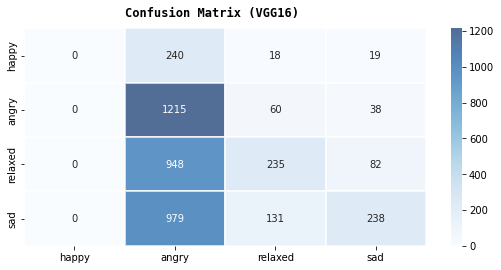

132/132 [==============================] - 9s 71ms/step - loss: 1.3099 - accuracy: 0.4016
1.3099477291107178 0.4016178846359253


In [ ]:
#Correct Ploting code
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_new = np.argmax(y_test_n, axis=1)
print(classification_report(y_test_new, y_pred))

fig, ax = plt.subplots(1, 1, figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test_new, y_pred), ax=ax, xticklabels=labels, yticklabels=labels, annot=True,
           cmap='Blues', alpha=0.7, linewidths=2, fmt='g')
fig.text(s='Confusion Matrix (VGG16)', size=12, fontweight='bold',
             fontname='monospace', y=0.92, x=0.28)
plt.show()

loss, accuracy = model.evaluate(X_test, y_test_n)
print(loss, accuracy)


In [ ]:
X_train.shape

(6862, 150, 150, 3)

In [23]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = effnet.output
model = tf.keras.layers.Dense(64, activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.25)(model)
model = tf.keras.layers.Dense(64, activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.25)(model)
model = tf.keras.layers.Dense(64, activation='relu')(model)
model = tf.keras.layers.Dropout(rate=0.25)(model)
model = tf.keras.layers.Dense(64, activation='relu')(model)
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.25)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs=model)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, verbose=1, batch_size=32)


Epoch 1/5
279/279 [==============================] - 431s 2s/step - loss: 1.0688 - accuracy: 0.5349 - val_loss: 1.1582 - val_accuracy: 0.5309
Epoch 2/5
279/279 [==============================] - 424s 2s/step - loss: 0.8975 - accuracy: 0.6350 - val_loss: 0.9513 - val_accuracy: 0.6108
Epoch 3/5
279/279 [==============================] - 432s 2s/step - loss: 0.8041 - accuracy: 0.6748 - val_loss: 1.0137 - val_accuracy: 0.6040
Epoch 4/5
279/279 [==============================] - 433s 2s/step - loss: 0.7031 - accuracy: 0.7268 - val_loss: 1.0759 - val_accuracy: 0.6004
Epoch 5/5
279/279 [==============================] - 433s 2s/step - loss: 0.6099 - accuracy: 0.7757 - val_loss: 1.2163 - val_accuracy: 0.5596


In [26]:
# with the learning rate
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model0 = effnet.output
model0 = tf.keras.layers.Dense(64, activation='relu')(model0)
model0 = tf.keras.layers.Dropout(rate=0.25)(model0)
model0 = tf.keras.layers.Dense(64, activation='relu')(model0)
model0 = tf.keras.layers.Dropout(rate=0.25)(model0)
model0 = tf.keras.layers.Dense(64, activation='relu')(model0)
model0 = tf.keras.layers.Dropout(rate=0.25)(model0)
model0 = tf.keras.layers.Dense(64, activation='relu')(model0)
model0 = tf.keras.layers.GlobalAveragePooling2D()(model0)
model0 = tf.keras.layers.Dropout(rate=0.25)(model0)
model0 = tf.keras.layers.Dense(4, activation='softmax')(model0)
model0 = tf.keras.models.Model(inputs=effnet.input, outputs=model0)
#opt = keras.optimizers.Adam(learning_rate=0.001)
#new learning rate(0.0001)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model0.compile(loss='categorical_crossentropy',  optimizer=opt, metrics=['accuracy'])
history = model0.fit(X_train, y_train, validation_split=0.2, epochs=5, verbose=1, batch_size=20)

Epoch 1/5
473/473 [==============================] - 472s 983ms/step - loss: 1.2095 - accuracy: 0.4242 - val_loss: 0.9154 - val_accuracy: 0.6184
Epoch 2/5
473/473 [==============================] - 458s 968ms/step - loss: 0.9091 - accuracy: 0.6124 - val_loss: 0.8408 - val_accuracy: 0.6548
Epoch 3/5
473/473 [==============================] - 458s 969ms/step - loss: 0.7799 - accuracy: 0.6831 - val_loss: 0.8325 - val_accuracy: 0.6646
Epoch 4/5
473/473 [==============================] - 461s 974ms/step - loss: 0.6492 - accuracy: 0.7421 - val_loss: 0.8555 - val_accuracy: 0.6646
Epoch 5/5
473/473 [==============================] - 461s 975ms/step - loss: 0.5060 - accuracy: 0.8070 - val_loss: 0.9573 - val_accuracy: 0.6409


In [27]:
pred0 = model0.predict(X_test)
pred0 = np.argmax(pred0,axis=1)
y_test_new0 = np.argmax(y_test, axis=1)
print(classification_report(y_test_new0,pred0))

159/159 [==============================] - 51s 316ms/step
              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1315
           1       0.88      0.84      0.86      1148
           2       0.53      0.61      0.57      1267
           3       0.64      0.60      0.62      1336

    accuracy                           0.67      5066
   macro avg       0.68      0.68      0.68      5066
weighted avg       0.68      0.67      0.67      5066



In [24]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test, axis=1)
print(classification_report(y_test_new,pred))

150/150 [==============================] - 49s 317ms/step
              precision    recall  f1-score   support

           0       0.75      0.45      0.56      1330
           1       0.92      0.66      0.77       834
           2       0.41      0.76      0.54      1222
           3       0.59      0.47      0.52      1392

    accuracy                           0.57      4778
   macro avg       0.67      0.59      0.60      4778
weighted avg       0.64      0.57      0.58      4778



In [32]:
# change in neurons fro 64 to 128
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model1 = effnet.output
model1 = tf.keras.layers.Dense(128, activation='relu')(model1)
model1 = tf.keras.layers.Dropout(rate=0.25)(model1)
model1 = tf.keras.layers.Dense(128, activation='relu')(model1)
model1 = tf.keras.layers.Dropout(rate=0.25)(model1)
model1 = tf.keras.layers.Dense(128, activation='relu')(model1)
model1 = tf.keras.layers.Dropout(rate=0.25)(model1)
model1 = tf.keras.layers.Dense(128, activation='relu')(model1)
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.25)(model1)
model1 = tf.keras.layers.Dense(4, activation='softmax')(model1)
model1 = tf.keras.models.Model(inputs=effnet.input, outputs=model1)
#opt = keras.optimizers.Adam(learning_rate=0.001)
#new learning rate(0.0001)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(loss='categorical_crossentropy',  optimizer=opt, metrics=['accuracy'])
history = model1.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=1, batch_size=20)

Epoch 1/10
503/503 [==============================] - 482s 937ms/step - loss: 1.1295 - accuracy: 0.4951 - val_loss: 0.8233 - val_accuracy: 0.6559
Epoch 2/10
503/503 [==============================] - 466s 926ms/step - loss: 0.7413 - accuracy: 0.7046 - val_loss: 0.6425 - val_accuracy: 0.7407
Epoch 3/10
503/503 [==============================] - 462s 919ms/step - loss: 0.4968 - accuracy: 0.8130 - val_loss: 0.5668 - val_accuracy: 0.7864
Epoch 4/10
503/503 [==============================] - 461s 917ms/step - loss: 0.3143 - accuracy: 0.8859 - val_loss: 0.5042 - val_accuracy: 0.8254
Epoch 5/10
503/503 [==============================] - 455s 904ms/step - loss: 0.2100 - accuracy: 0.9273 - val_loss: 0.5230 - val_accuracy: 0.8333
Epoch 6/10
503/503 [==============================] - 454s 904ms/step - loss: 0.1596 - accuracy: 0.9450 - val_loss: 0.4905 - val_accuracy: 0.8520
Epoch 7/10
503/503 [==============================] - 454s 903ms/step - loss: 0.1203 - accuracy: 0.9586 - val_loss: 0.5483 -

In [33]:
pred1 = model1.predict(X_test)
pred1 = np.argmax(pred1,axis=1)
y_test_new1 = np.argmax(y_test, axis=1)
print(classification_report(y_test_new1,pred1))

169/169 [==============================] - 50s 291ms/step
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1179
           1       0.82      0.89      0.85      1169
           2       0.87      0.81      0.84      1221
           3       0.89      0.89      0.89      1817

    accuracy                           0.88      5386
   macro avg       0.88      0.88      0.88      5386
weighted avg       0.88      0.88      0.88      5386



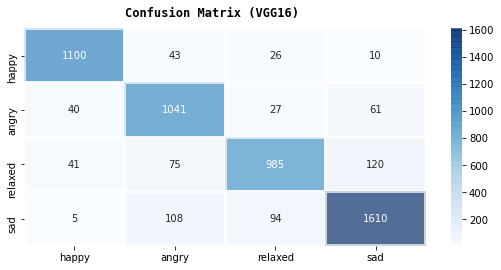

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test_new1, pred1), ax=ax, xticklabels=label, yticklabels=label, annot=True,
           cmap='Blues', alpha=0.7, linewidths=2, fmt='g')
fig.text(s='Confusion Matrix (VGG16)', size=12, fontweight='bold',
             fontname='monospace', y=0.92, x=0.28)
plt.show()

In [ ]:
resnet_model = Sequential()
pretrained_model=ResNet50(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
for layer in pretrained_model.layers:
        layer.trainable=False
resnet_model.add(pretrained_model)

In [ ]:
model1 = resnet_model.output
model1 = tf.keras.layers.Dense(256,activation='relu')(model1)
model1 = tf.keras.layers.MaxPooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.25)(model1)
model1 = tf.keras.layers.Dense(256,activation='relu')(model1)
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.5)(model1)
model1 = tf.keras.layers.Dense(4,activation='softmax')(model1)
model1 = tf.keras.models.Model(inputs=resnet_model.input, outputs = model1)

In [23]:
lab=['a','g','c']
aa = []
aaa=['a','c','a','g','a','g','c','a','c','a','g','a','g','c','a','c','a','g','a','g','c']
b=['a','c','a','g','a','g','c','a','c','a','g','a','g','c','a','c','a','g','a','g','c']
for i in aaa:
    aa.append(lab.index(i))
aaa = aa
aaa = tf.keras.utils.to_categorical(aaa)

In [24]:
aaa

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [16]:
# change in neurons fro 64 to 128
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model3 = effnet.output
model3 = tf.keras.layers.Dense(128, activation='relu')(model3)
model3 = tf.keras.layers.Dropout(rate=0.25)(model3)
model3 = tf.keras.layers.Dense(128, activation='relu')(model3)
model3 = tf.keras.layers.Dropout(rate=0.25)(model3)
model3 = tf.keras.layers.Dense(128, activation='relu')(model3)
model3 = tf.keras.layers.Dropout(rate=0.25)(model3)
model3 = tf.keras.layers.Dense(128, activation='relu')(model3)
model3 = tf.keras.layers.GlobalAveragePooling2D()(model3)
model3 = tf.keras.layers.Dropout(rate=0.25)(model3)
model3 = tf.keras.layers.Dense(4, activation='softmax')(model3)
model3 = tf.keras.models.Model(inputs=effnet.input, outputs=model3)
#opt = keras.optimizers.Adam(learning_rate=0.001)
#new learning rate(0.0001)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(loss='categorical_crossentropy',  optimizer=opt, metrics=['accuracy'])
history = model3.fit(X_train, y_train, validation_split=0.2, epochs=20, verbose=1, batch_size=20)

Epoch 1/20
503/503 [==============================] - 469s 918ms/step - loss: 1.1110 - accuracy: 0.4964 - val_loss: 0.8103 - val_accuracy: 0.6778
Epoch 2/20
503/503 [==============================] - 489s 972ms/step - loss: 0.7519 - accuracy: 0.6901 - val_loss: 0.6437 - val_accuracy: 0.7422
Epoch 3/20
503/503 [==============================] - 476s 946ms/step - loss: 0.5158 - accuracy: 0.7999 - val_loss: 0.5280 - val_accuracy: 0.7963
Epoch 4/20
503/503 [==============================] - 483s 960ms/step - loss: 0.3160 - accuracy: 0.8791 - val_loss: 0.4882 - val_accuracy: 0.8313
Epoch 5/20
503/503 [==============================] - 484s 963ms/step - loss: 0.2202 - accuracy: 0.9229 - val_loss: 0.5177 - val_accuracy: 0.8361
Epoch 6/20
503/503 [==============================] - 484s 963ms/step - loss: 0.1685 - accuracy: 0.9411 - val_loss: 0.4741 - val_accuracy: 0.8532
Epoch 7/20
503/503 [==============================] - 484s 963ms/step - loss: 0.1319 - accuracy: 0.9547 - val_loss: 0.5061 -

In [17]:
pred3 = model3.predict(X_test)
pred3 = np.argmax(pred3,axis=1)
y_test_new3 = np.argmax(y_test, axis=1)
print(classification_report(y_test_new3,pred3))

169/169 [==============================] - 51s 297ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1179
           1       0.87      0.88      0.88      1169
           2       0.85      0.88      0.86      1221
           3       0.91      0.90      0.90      1817

    accuracy                           0.89      5386
   macro avg       0.89      0.89      0.89      5386
weighted avg       0.90      0.89      0.89      5386



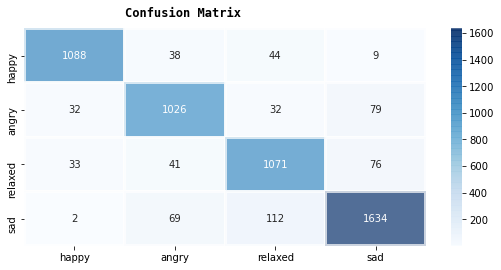

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test_new3, pred3), ax=ax, xticklabels=label, yticklabels=label, annot=True,
           cmap='Blues', alpha=0.7, linewidths=2, fmt='g')
fig.text(s='Confusion Matrix', size=12, fontweight='bold',
             fontname='monospace', y=0.92, x=0.28)
plt.show()

In [19]:
# change in neurons fro 64 to 128 to 256
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model4 = effnet.output
model4 = tf.keras.layers.Dense(256, activation='relu')(model4)
model4 = tf.keras.layers.Dropout(rate=0.25)(model4)
model4 = tf.keras.layers.Dense(256, activation='relu')(model4)
model4 = tf.keras.layers.Dropout(rate=0.25)(model4)
model4 = tf.keras.layers.Dense(256, activation='relu')(model4)
model4 = tf.keras.layers.Dropout(rate=0.25)(model4)
model4 = tf.keras.layers.Dense(256, activation='relu')(model4)
model4 = tf.keras.layers.GlobalAveragePooling2D()(model4)
model4 = tf.keras.layers.Dropout(rate=0.25)(model4)
model4 = tf.keras.layers.Dense(3, activation='softmax')(model4)
model4 = tf.keras.models.Model(inputs=effnet.input, outputs=model4)
#opt = keras.optimizers.Adam(learning_rate=0.001)
#new learning rate(0.0001)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model4.compile(loss='categorical_crossentropy',  optimizer=opt, metrics=['accuracy'])
history = model4.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=1, batch_size=20)

Epoch 1/10
391/391 [==============================] - 362s 911ms/step - loss: 0.7549 - accuracy: 0.6466 - val_loss: 0.4428 - val_accuracy: 0.8188
Epoch 2/10
391/391 [==============================] - 357s 913ms/step - loss: 0.4040 - accuracy: 0.8314 - val_loss: 0.3282 - val_accuracy: 0.8680
Epoch 3/10
391/391 [==============================] - 360s 920ms/step - loss: 0.2392 - accuracy: 0.9089 - val_loss: 0.2658 - val_accuracy: 0.8982
Epoch 4/10
391/391 [==============================] - 360s 920ms/step - loss: 0.1368 - accuracy: 0.9512 - val_loss: 0.2624 - val_accuracy: 0.9053
Epoch 5/10
391/391 [==============================] - 361s 923ms/step - loss: 0.1044 - accuracy: 0.9643 - val_loss: 0.2816 - val_accuracy: 0.9156
Epoch 6/10
391/391 [==============================] - 363s 928ms/step - loss: 0.0702 - accuracy: 0.9745 - val_loss: 0.3133 - val_accuracy: 0.9176
Epoch 7/10
391/391 [==============================] - 363s 930ms/step - loss: 0.0580 - accuracy: 0.9804 - val_loss: 0.2905 -

In [20]:
pred4 = model4.predict(X_test)
pred4 = np.argmax(pred4,axis=1)
y_test_new4 = np.argmax(y_test, axis=1)
print(classification_report(y_test_new4,pred4))

131/131 [==============================] - 41s 307ms/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1241
           1       0.93      0.82      0.87      1143
           2       0.92      0.97      0.94      1802

    accuracy                           0.93      4186
   macro avg       0.93      0.92      0.92      4186
weighted avg       0.93      0.93      0.93      4186



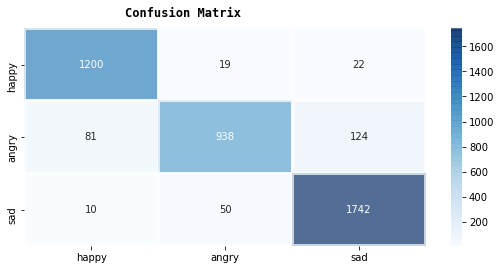

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test_new4, pred4), ax=ax, xticklabels=label, yticklabels=label, annot=True,
           cmap='Blues', alpha=0.7, linewidths=2, fmt='g')
fig.text(s='Confusion Matrix', size=12, fontweight='bold',
             fontname='monospace', y=0.92, x=0.28)
plt.show()

In [22]:
incep = InceptionV3(input_shape=(image_size,image_size,3), include_top = False, weights = 'imagenet')

87910968/87910968 [==============================] - 18s 0us/step


In [23]:
model5 = incep.output
model5 = tf.keras.layers.Dense(256, activation='relu')(model5)
model5 = tf.keras.layers.Dropout(rate=0.25)(model5)
model5 = tf.keras.layers.Dense(256, activation='relu')(model5)
model5 = tf.keras.layers.Dropout(rate=0.25)(model5)
model5 = tf.keras.layers.Dense(256, activation='relu')(model5)
model5 = tf.keras.layers.Dropout(rate=0.25)(model5)
model5 = tf.keras.layers.Dense(256, activation='relu')(model5)
model5 = tf.keras.layers.GlobalAveragePooling2D()(model5)
model5 = tf.keras.layers.Dropout(rate=0.25)(model5)
model5 = tf.keras.layers.Dense(3, activation='softmax')(model5)
model5 = tf.keras.models.Model(inputs=incep.input, outputs = model5)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model5.compile(loss='categorical_crossentropy',  optimizer=opt, metrics=['accuracy'])
history = model5.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=1, batch_size=20)

Epoch 1/10
391/391 [==============================] - 367s 925ms/step - loss: 0.7836 - accuracy: 0.6421 - val_loss: 0.5784 - val_accuracy: 0.7559
Epoch 2/10
391/391 [==============================] - 378s 966ms/step - loss: 0.4189 - accuracy: 0.8313 - val_loss: 0.5359 - val_accuracy: 0.8137
Epoch 3/10
391/391 [==============================] - 373s 954ms/step - loss: 0.2456 - accuracy: 0.9121 - val_loss: 0.4948 - val_accuracy: 0.8199
Epoch 4/10
391/391 [==============================] - 369s 943ms/step - loss: 0.1466 - accuracy: 0.9459 - val_loss: 0.5148 - val_accuracy: 0.8480
Epoch 5/10
391/391 [==============================] - 371s 949ms/step - loss: 0.1130 - accuracy: 0.9593 - val_loss: 0.6755 - val_accuracy: 0.8178
Epoch 6/10
391/391 [==============================] - 376s 962ms/step - loss: 0.0967 - accuracy: 0.9654 - val_loss: 0.4537 - val_accuracy: 0.8649
Epoch 7/10
391/391 [==============================] - 378s 967ms/step - loss: 0.0862 - accuracy: 0.9715 - val_loss: 0.5888 -

In [24]:
pred5 = model5.predict(X_test)
pred5 = np.argmax(pred5,axis=1)
y_test_new5 = np.argmax(y_test, axis=1)
print(classification_report(y_test_new5,pred5))

131/131 [==============================] - 26s 194ms/step
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1241
           1       0.78      0.82      0.80      1143
           2       0.89      0.89      0.89      1802

    accuracy                           0.87      4186
   macro avg       0.87      0.87      0.87      4186
weighted avg       0.88      0.87      0.87      4186



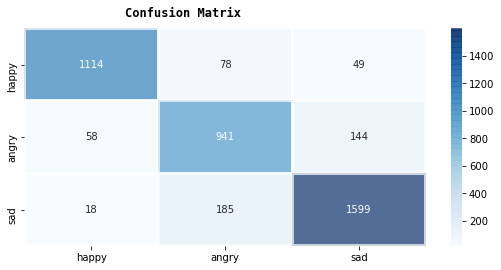

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test_new5, pred5), ax=ax, xticklabels=label, yticklabels=label, annot=True,
           cmap='Blues', alpha=0.7, linewidths=2, fmt='g')
fig.text(s='Confusion Matrix', size=12, fontweight='bold',
             fontname='monospace', y=0.92, x=0.28)
plt.show()

In [30]:
res=tf.keras.applications.ResNet50V2(input_shape=(image_size,image_size,3), include_top = False, weights = 'imagenet')

In [48]:
nasnet=tf.keras.applications.MobileNetV2(input_shape=(image_size,image_size,3), include_top = False, weights = 'imagenet')

In [49]:
model6 = nasnet.output
model6 = tf.keras.layers.Dense(256, activation='relu')(model6)
model6 = tf.keras.layers.Dropout(rate=0.25)(model6)
model6 = tf.keras.layers.Dense(256, activation='relu')(model6)
model6 = tf.keras.layers.Dropout(rate=0.25)(model6)
model6 = tf.keras.layers.Dense(256, activation='relu')(model6)
model6 = tf.keras.layers.Dropout(rate=0.25)(model6)
model6 = tf.keras.layers.Dense(256, activation='relu')(model6)
model6 = tf.keras.layers.GlobalAveragePooling2D()(model6)
model6 = tf.keras.layers.Dropout(rate=0.25)(model6)
model6 = tf.keras.layers.Dense(3, activation='softmax')(model6)
model6 = tf.keras.models.Model(inputs=nasnet.input, outputs = model6)
opt = keras.optimizers.Adam(learning_rate=0.0001)
model6.compile(loss='categorical_crossentropy',  optimizer=opt, metrics=['accuracy'])
history = model6.fit(X_train, y_train, validation_split=0.2, epochs=10, verbose=1, batch_size=20)

Epoch 1/10
391/391 [==============================] - 249s 626ms/step - loss: 0.7361 - accuracy: 0.6633 - val_loss: 1.3688 - val_accuracy: 0.5972
Epoch 2/10
391/391 [==============================] - 243s 622ms/step - loss: 0.4033 - accuracy: 0.8385 - val_loss: 0.4585 - val_accuracy: 0.8342
Epoch 3/10
391/391 [==============================] - 244s 625ms/step - loss: 0.2205 - accuracy: 0.9191 - val_loss: 0.5047 - val_accuracy: 0.8321
Epoch 4/10
391/391 [==============================] - 245s 626ms/step - loss: 0.1362 - accuracy: 0.9534 - val_loss: 0.5758 - val_accuracy: 0.8439
Epoch 5/10
391/391 [==============================] - 245s 627ms/step - loss: 0.1035 - accuracy: 0.9630 - val_loss: 0.5225 - val_accuracy: 0.8588
Epoch 6/10
391/391 [==============================] - 253s 646ms/step - loss: 0.0865 - accuracy: 0.9703 - val_loss: 0.4952 - val_accuracy: 0.8654
Epoch 7/10
391/391 [==============================] - 256s 655ms/step - loss: 0.0696 - accuracy: 0.9771 - val_loss: 0.6118 -

In [52]:
pred6 = model6.predict(X_test)
pred6 = np.argmax(pred6,axis=1)
y_test_new6 = np.argmax(y_test, axis=1)
print(classification_report(y_test_new6,pred6))

131/131 [==============================] - 24s 180ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1241
           1       0.88      0.71      0.79      1143
           2       0.88      0.93      0.90      1802

    accuracy                           0.88      4186
   macro avg       0.88      0.86      0.87      4186
weighted avg       0.88      0.88      0.87      4186



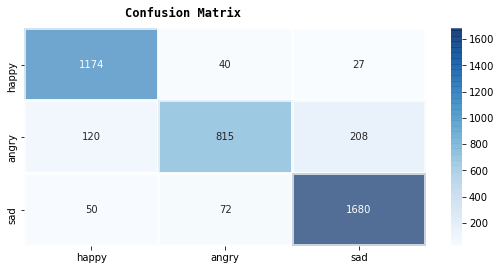

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
sns.heatmap(confusion_matrix(y_test_new6, pred6), ax=ax, xticklabels=label, yticklabels=label, annot=True,
           cmap='Blues', alpha=0.7, linewidths=2, fmt='g')
fig.text(s='Confusion Matrix', size=12, fontweight='bold',
             fontname='monospace', y=0.92, x=0.28)
plt.show()